In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Check total length of dataset.
len(df)

100000

In [4]:
# Check for data type in each column.
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [5]:
# Check duplicate index.
df[df.index.duplicated(keep=False)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [ ]:
# 1️⃣ ตรวจจำนวนแถวซ้ำทั้งหมด
num_duplicates = df.duplicated().sum()
print(f"จำนวนแถวที่ซ้ำกันทั้งหมด: {num_duplicates}")

จำนวนแถวที่ซ้ำกันทั้งหมด: 3854


In [7]:
df = df.drop_duplicates()

In [8]:
num_duplicates = df.duplicated().sum()
print(f"จำนวนแถวที่ซ้ำกันทั้งหมด: {num_duplicates}")

จำนวนแถวที่ซ้ำกันทั้งหมด: 0


In [9]:
print("Value counts for Gender:\n", df['gender'].value_counts())
print("\nValue counts for Smoking History:\n", df['smoking_history'].value_counts())

Value counts for Gender:
 gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

Value counts for Smoking History:
 smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64


In [10]:
# กรองแถวที่มีค่า 'Other' ในคอลัมน์ gender ทิ้งไป
df = df[df['gender'] != 'Other']
# หลังลบ (เพื่อตรวจสอบ)
print("\nขนาดของ gender หลังลบ :", df.shape)
print(df['gender'].value_counts())


ขนาดของ gender หลังลบ : (96128, 9)
gender
Female    56161
Male      39967
Name: count, dtype: int64


In [ ]:
# แสดงค่าเดิมเพื่อเปรียบเทียบ
print("Original smoking_history counts:")
print(df['smoking_history'].value_counts())
print("-" * 30)

# สร้าง Dictionary สำหรับการจับคู่
# เราจะรวมกลุ่ม 'former', 'not current', 'ever' ให้เป็น 'past_smoker'
smoking_map = {
    'former': 'past_smoker',
    'not current': 'past_smoker',
    'ever': 'past_smoker',
    'No Info': 'No Infomation' # เปลี่ยนชื่อให้อ่านง่ายขึ้น ถ
}

# ทำการแทนที่ค่าในคอลัมน์
df['smoking_history'] = df['smoking_history'].replace(smoking_map)

# แสดงค่าใหม่หลังการจัดกลุ่ม
print("New smoking_history counts:")
print(df['smoking_history'].value_counts())

Original smoking_history counts:
smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64
------------------------------
New smoking_history counts:
smoking_history
never            34395
No Infomation    32881
past_smoker      19655
current           9197
Name: count, dtype: int64


In [12]:
label = 'diabetes'
num_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
cate_features = ['gender', 'smoking_history']
features = num_features + cate_features

# แยก X และ y
X = df[features]
y = df[label]

In [13]:
# Check for missing values in each column.
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [14]:
# Check continuous features values.
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


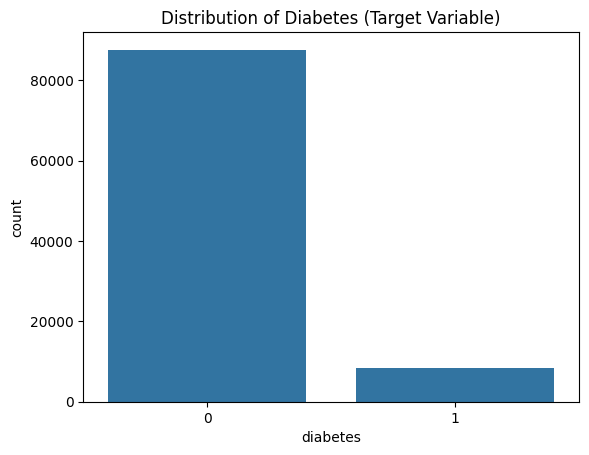

In [15]:
# ตรวจสัดส่วน class
y.value_counts(normalize=True)
sns.countplot(x=y)
plt.title("Distribution of Diabetes (Target Variable)")
plt.show()

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

categorical_features = cate_features
numeric_features = num_features

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
# sklearn imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import randint

# สร้าง object cv
cv_strategy = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Import SMOTE และ Pipeline จาก imblearn
# ----------------------------------------------------
from imblearn.pipeline import Pipeline  # <--- สำคัญ: ใช้ Pipeline จาก imblearn
from imblearn.over_sampling import SMOTE
# ----------------------------------------------------

# สร้าง pipeline รวม preprocessing + SMOTE + model
# เพิ่ม SMOTE เข้าไปใน Pipeline
# ----------------------------------------------------
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # <--- เพิ่ม SMOTE ตรงนี้
    ('classifier', RandomForestClassifier(random_state=42))
])
# ----------------------------------------------------

# ส่วนที่เหลือเหมือนเดิมทั้งหมด ไม่ต้องแก้ไข
param_dist = {
    'smote__k_neighbors': randint (3, 11), # <--- เพิ่ม parameter ของ SMOTE 
    'classifier__n_estimators': randint(100, 200),
    'classifier__max_depth': [None, 5, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv_strategy,
    n_jobs=-1,
    scoring='f1',
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)
print("✅ Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 15 folds for each of 25 candidates, totalling 375 fits
[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=3, classifier__min_samples_split=9, classifier__n_estimators=160, smote__k_neighbors=7; total time=  28.8s
[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=3, classifier__min_samples_split=9, classifier__n_estimators=160, smote__k_neighbors=7; total time=  28.9s
[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=3, classifier__min_samples_split=9, classifier__n_estimators=160, smote__k_neighbors=7; total time=  28.9s
[CV] END classifier__bootstrap=True, classifier__class_weight=balanced, classifier__max_depth=30, classifier__max_features=sqrt, classifier__m


Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     17530
           1       0.74      0.77      0.75      1696

    accuracy                           0.96     19226
   macro avg       0.86      0.87      0.86     19226
weighted avg       0.96      0.96      0.96     19226


Confusion Matrix (Random Forest):


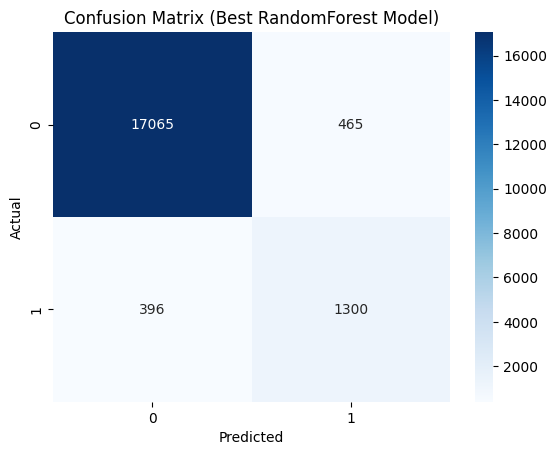

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# ทำนายผลด้วย Random Forest ที่ดีที่สุด
y_pred = random_search.best_estimator_.predict(X_test)
print("\nClassification Report (RandomForest):\n", classification_report(y_test, y_pred))

# Confusion Matrix สำหรับ Random Forest
print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Best RandomForest Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

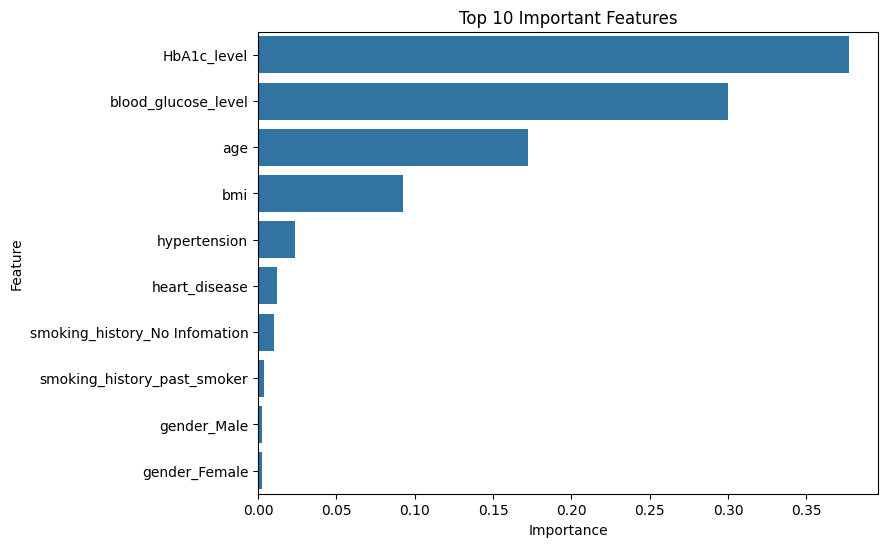


Top 10 Important Features:
                           Feature  Importance
10                    HbA1c_level    0.376910
11            blood_glucose_level    0.299685
6                             age    0.172324
9                             bmi    0.092389
7                    hypertension    0.023386
8                   heart_disease    0.012301
2   smoking_history_No Infomation    0.010020
5     smoking_history_past_smoker    0.003877
1                     gender_Male    0.002628
0                   gender_Female    0.002581


In [20]:
# ดึงชื่อ feature หลัง preprocessing
feature_names = (
    random_search.best_estimator_.named_steps["preprocessor"]
    .transformers_[0][1]
    .get_feature_names_out(cate_features)
)
feature_names = np.concatenate([feature_names, num_features])

# คำนวณความสำคัญของแต่ละ feature
importances = random_search.best_estimator_.named_steps["classifier"].feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# แสดง top 10
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

print("\nTop 10 Important Features:\n", feature_importance_df.head(10))

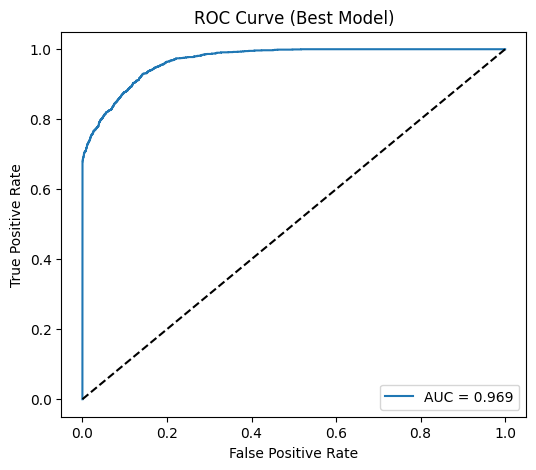

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# คำนวณความน่าจะเป็น (probability)
best_rf_model = random_search.best_estimator_
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# คำนวณค่า FPR/TPR
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# วาดกราฟ
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Best Model)")
plt.legend(loc="lower right")
plt.show()

In [22]:
%pip install lightgbm
from imblearn.pipeline import Pipeline
import lightgbm as lgb

# 1. สร้าง Pipeline ใหม่สำหรับ LightGBM
pipe_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    # is_unbalance=True หรือ scale_pos_weight จะช่วยจัดการ Imbalance ได้ดี
    ('classifier', lgb.LGBMClassifier(random_state=42))
])

# 2. สร้าง param_dist ใหม่สำหรับ LightGBM
param_dist_lgbm = {
    'smote__k_neighbors': randint(3, 11),
    'classifier__n_estimators': randint(100, 500),
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__num_leaves': randint(20, 50),
    'classifier__max_depth': [-1, 10, 20],
    'classifier__scale_pos_weight': [None, 9] 
}

# 3. รัน RandomizedSearchCV กับโมเดลใหม่
random_search_lgbm = RandomizedSearchCV(
    estimator=pipe_lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=25, 
    cv=5,
    scoring='f1',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search_lgbm.fit(X_train, y_train)

Note: you may need to restart the kernel to use updated packages.
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Info] Number of positive: 56093, number of negative: 56093
[LightGBM] [Info] Number of positive: 56093, number of negative: 56093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of positive: 56093, number of negative: 56093
[LightGBM] [Info] Number of data points in the train set: 112186, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 56092, number of negative: 56092
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030716 seconds.
You can set `force_col_wise=true` to remove the ove

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'classifier__learning_rate': [0.01, 0.05, ...], 'classifier__max_depth': [-1, 10, ...], 'classifier__n_estimators': <scipy.stats....t 0x12f55c4d0>, 'classifier__num_leaves': <scipy.stats....t 0x12f3c98c0>, ...}"
,n_iter,25
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan



--- ผลลัพธ์ของ LightGBM Model ---
✅ Best F1 Score (LGBM): 0.8002419143359711
✅ Best Parameters Found (LGBM):
{'classifier__learning_rate': 0.1, 'classifier__max_depth': -1, 'classifier__n_estimators': 230, 'classifier__num_leaves': 24, 'classifier__scale_pos_weight': None, 'smote__k_neighbors': 9}

🎯 Test Accuracy (LGBM): 0.9695724539685842

📄 Classification Report (LGBM):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17530
           1       0.93      0.71      0.80      1696

    accuracy                           0.97     19226
   macro avg       0.95      0.85      0.89     19226
weighted avg       0.97      0.97      0.97     19226



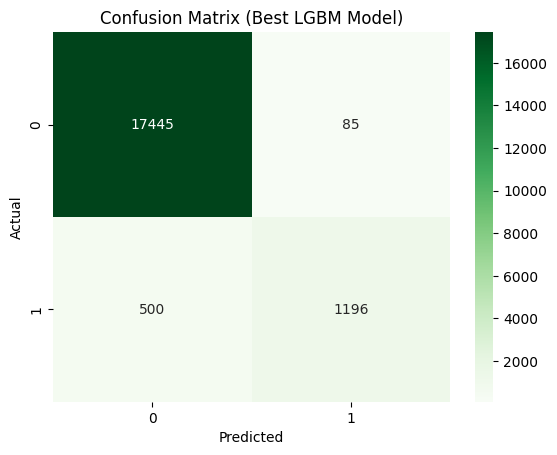

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- วางต่อจาก random_search_lgbm.fit() ---

print("\n--- ผลลัพธ์ของ LightGBM Model ---")

# ดึงโมเดลที่ดีที่สุดของ LGBM ออกมา
best_lgbm_model = random_search_lgbm.best_estimator_

print("✅ Best F1 Score (LGBM):", random_search_lgbm.best_score_)
print("✅ Best Parameters Found (LGBM):")
print(random_search_lgbm.best_params_)

# ทำนายผลด้วยข้อมูล test ชุดเดิม
y_pred_lgbm = best_lgbm_model.predict(X_test)

# ประเมินผล
print("\n🎯 Test Accuracy (LGBM):", accuracy_score(y_test, y_pred_lgbm))
print("\n📄 Classification Report (LGBM):\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens') # เปลี่ยนสีให้เห็นความแตกต่าง
plt.title("Confusion Matrix (Best LGBM Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

📊 PR-AUC (RandomForest): 0.8615
📊 PR-AUC (LightGBM):    0.8777


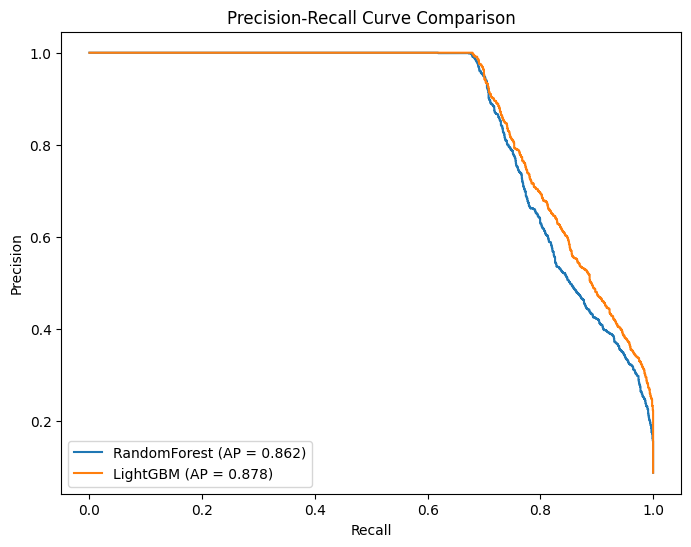

In [24]:
from sklearn.metrics import average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt

# --- 1. ดึงโมเดลที่ดีที่สุดของแต่ละอัลกอริทึม ---
best_rf_model = random_search.best_estimator_
best_lgbm_model = random_search_lgbm.best_estimator_

# --- 2. คำนวณความน่าจะเป็น (Probabilities) ของทั้งสองโมเดล ---
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_proba_lgbm = best_lgbm_model.predict_proba(X_test)[:, 1]

# --- 3. คำนวณ PR-AUC (Average Precision) ของแต่ละโมเดล ---
pr_auc_rf = average_precision_score(y_test, y_proba_rf)
pr_auc_lgbm = average_precision_score(y_test, y_proba_lgbm)

print(f"📊 PR-AUC (RandomForest): {pr_auc_rf:.4f}")
print(f"📊 PR-AUC (LightGBM):    {pr_auc_lgbm:.4f}")

# --- 4. สร้างข้อมูลสำหรับ PR Curve ของแต่ละโมเดล ---
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_proba_lgbm)

# --- 5. วาดกราฟเปรียบเทียบ ---
plt.figure(figsize=(8, 6))

# พล็อตกราฟของ RandomForest
plt.plot(recall_rf, precision_rf, label=f'RandomForest (AP = {pr_auc_rf:.3f})')

# พล็อตกราฟของ LightGBM บนแกนเดียวกัน
plt.plot(recall_lgbm, precision_lgbm, label=f'LightGBM (AP = {pr_auc_lgbm:.3f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend() # แสดงชื่อของแต่ละเส้น
plt.show()